In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/feature_data.csv")


In [5]:
labels=df.iloc[:,-1:]
features=df.drop('Name',axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,random_state=109) # 70% training and 30% test


In [7]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [8]:
clf = svm.SVC(kernel='linear',C=20) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8370867273598467


In [10]:
metrics.confusion_matrix(y_test,y_pred)

array([[238,   0,   3,   0,  15,   0,  14,   0,   0,   0,   0],
       [  0,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   1, 251,   0,  12,   0,   1,   0,   0,   3,   1],
       [  0,   0,   0,  89,   0,   0,   0,  10,   6,   0,   0],
       [ 27,   0,   8,   0, 130,   0,  31,   0,   0,   0,   0],
       [  0,   0,   2,   0,   0,   4,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   4,   0, 283,   5,   0,   0,   0],
       [  0,   0,   1,   9,   0,   0,   3, 427,  61,   0,   0],
       [  0,   0,   0,   8,   0,   0,   0,  91, 288,   0,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0,   0,  17,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0,   0,   0,  10]])

In [11]:
# np.save('model.npy',clf)
import pickle

pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

**Experimenting with the value of C**

In [16]:
c=[0.1,1,5,10,20,50]
acc=list()
for i in c:
  clf = svm.SVC(kernel='linear',C=i) # Linear Kernel
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, y_pred))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Text(0, 0.5, 'Value of accuracy')

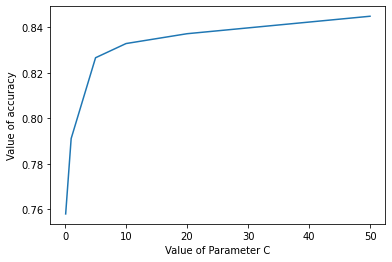

In [17]:
from matplotlib import pyplot as plt
plt.plot(c,acc)
plt.xlabel("Value of Parameter C")
plt.ylabel("Value of accuracy")